In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_P = pd.read_csv('Creditcard.zip', encoding = 'utf-8') #carrega o csv usando pd

In [3]:
df_P.head(10)



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
df_P.tail(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,54,2,1,4,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139,0.992680,0.007320
10108,714471183,Attrited Customer,47,M,4,Graduate,Divorced,$80K - $120K,Blue,39,4,3,4,17504.0,476,17028.0,0.892,10468,66,0.737,0.027,0.998160,0.001844
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,4,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.000,0.000896,0.999100
10110,718225683,Existing Customer,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032,0.000097,0.999900
10111,710734308,Existing Customer,49,M,1,Graduate,Single,$60K - $80K,Blue,40,6,3,3,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242,0.000284,0.999720
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,0.994380,0.005620
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189,0.993380,0.006620
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than $40K,Blue,15,3,1,5,4700.0,0,4700.0,0.617,14723,96,0.655,0.000,0.000235,0.999770
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,2,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276,0.000174,0.999830
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.999810


In [5]:
counts = df_P['Card_Category'].value_counts()
percentages = counts / counts.sum() * 100
df2 = pd.DataFrame({'counts': counts, 'percentages': percentages})

print(df2)

          counts  percentages
Blue        9436    93.176656
Silver       555     5.480399
Gold         116     1.145453
Platinum      20     0.197492


In [6]:
counts = df_P.groupby('Card_Category').agg({'CLIENTNUM': pd.Series.nunique, 'Card_Category': pd.Series.count})

# Adicione uma coluna com o percentual que cada país representa
percentages = counts['Card_Category'] / counts['Card_Category'].sum() * 100
counts['percentages'] = percentages

print(counts)

               CLIENTNUM  Card_Category  percentages
Card_Category                                       
Blue                9436           9436    93.176656
Gold                 116            116     1.145453
Platinum              20             20     0.197492
Silver               555            555     5.480399


In [7]:
df_P.dtypes


CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [8]:
# Calcular a porcentagem de valores nulos em cada coluna
percentual_nulos = df_P.isnull().mean() * 100

# Exibir o resultado
print(percentual_nulos)

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [9]:
# Eliminar as linhas onde o CustomerID é nulo
df = df_P.dropna(subset=['CLIENTNUM'])

# Exibir o DataFrame resultante
print(df_P.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44     

In [10]:
# Calcular a porcentagem de valores nulos em cada coluna
percentual_nulos = df_P.isnull().mean() * 100

# Exibir o resultado
print(percentual_nulos)

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [11]:
# Criar o novo DataFrame agrupado por cliente e com as colunas "Description" como colunas
novo_df = df.pivot_table(index=['CLIENTNUM', 'Card_Category'], columns='Attrition_Flag', values='Credit_Limit', aggfunc='sum')



# Exibir o novo DataFrame
novo_df.head()

,Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,Card_Category,,
708082083,Blue,NaN,3544.0
708083283,Blue,3421.0,NaN
708084558,Blue,8258.0,NaN
708085458,Blue,NaN,1438.3
708086958,Blue,NaN,3128.0


In [12]:
# Criar o novo DataFrame agrupado por "IDclient" e com a coluna "Valor" como a soma da coluna "Valor" de "df"
df_Valor = df.groupby('CLIENTNUM')['Credit_Limit'].sum().reset_index()

 # Exibir o novo DataFrame
print(df_Valor.head())

   CLIENTNUM  Credit_Limit
0  708082083        3544.0
1  708083283        3421.0
2  708084558        8258.0
3  708085458        1438.3
4  708086958        3128.0


In [13]:
# Visualizar as linhas onde o "CustomerID" 
df_visualizar = df.loc[df['CLIENTNUM'] == 708082083]

# Exibir as linhas selecionadas
print(df_visualizar.head())

      CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9821  708082083  Existing Customer            45      F                3   

     Education_Level Marital_Status Income_Category Card_Category  \
9821     High School        Married  Less than $40K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9821              36                         4                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9821                      3        3544.0                 1661   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9821           1883.0                 0.831            15149             111   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
9821                0.734                  0.469   

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
9821                

In [14]:
Df_Segmentação = pd.merge(novo_df, df_Valor, on='CLIENTNUM')

# Exibir o novo DataFrame
Df_Segmentação.head()

,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
0,708082083,NaN,3544.0,3544.0
1,708083283,3421.0,NaN,3421.0
2,708084558,8258.0,NaN,8258.0
3,708085458,NaN,1438.3,1438.3
4,708086958,NaN,3128.0,3128.0


In [15]:
# Eliminar as linhas onde "Valor" é igual a 0
Df_Segmentação = Df_Segmentação[Df_Segmentação['CLIENTNUM'] != 0]

# Substituir todos os valores NaN por 0 em todas as colunas
Df_Segmentação = Df_Segmentação.fillna(0)

# Exibir o novo DataFrame
Df_Segmentação.head()

,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
0,708082083,0.0,3544.0,3544.0
1,708083283,3421.0,0.0,3421.0
2,708084558,8258.0,0.0,8258.0
3,708085458,0.0,1438.3,1438.3
4,708086958,0.0,3128.0,3128.0


In [16]:
Df_Segmentação.describe()

,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
count,1.012700e+04,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,1307.133031,7324.820668,8631.953698
std,3.690378e+07,4712.843874,8918.849969,9088.776650
min,7.080821e+08,0.000000,0.000000,1438.300000
25%,7.130368e+08,0.000000,1912.000000,2555.000000
50%,7.179264e+08,0.000000,3453.000000,4549.000000
75%,7.731435e+08,0.000000,9315.500000,11067.500000
max,8.283431e+08,34516.000000,34516.000000,34516.000000


In [17]:
# Eliminar as linhas onde qualquer valor seja menor que 0
Df_Segmentação = Df_Segmentação[(Df_Segmentação >= 0).all(1)]

# Exibir o novo DataFrame
Df_Segmentação.head()

,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
0,708082083,0.0,3544.0,3544.0
1,708083283,3421.0,0.0,3421.0
2,708084558,8258.0,0.0,8258.0
3,708085458,0.0,1438.3,1438.3
4,708086958,0.0,3128.0,3128.0


In [18]:
Df_Segmentação = Df_Segmentação.loc[:, (Df_Segmentação != 0).any(axis=0)]

# Exibir o novo DataFrame
Df_Segmentação.head()

,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
0,708082083,0.0,3544.0,3544.0
1,708083283,3421.0,0.0,3421.0
2,708084558,8258.0,0.0,8258.0
3,708085458,0.0,1438.3,1438.3
4,708086958,0.0,3128.0,3128.0


In [19]:
Df_Segmentação.shape

(10127, 4)

In [20]:
Df_Segmentação2 = Df_Segmentação.copy()

# Normalizar todas as colunas exceto "CustomerID"

Df_Segmentação2.iloc[:, 1:] = Df_Segmentação2.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Exibir o novo DataFrame
Df_Segmentação2.head()


,CLIENTNUM,Attrited Customer,Existing Customer,Credit_Limit
0,708082083,0.000000,0.102677,0.063659
1,708083283,0.099113,0.000000,0.059941
2,708084558,0.239251,0.000000,0.206172
3,708085458,0.000000,0.041671,0.000000
4,708086958,0.000000,0.090625,0.051083


In [21]:
Df_Segmentação2.dtypes

CLIENTNUM              int64
Attrited Customer    float64
Existing Customer    float64
Credit_Limit         float64
dtype: object

In [22]:
Df_Segmentação2 = Df_Segmentação2.drop('CLIENTNUM', axis=1)

Df_Segmentação2

,Attrited Customer,Existing Customer,Credit_Limit
0,0.000000,0.102677,0.063659
1,0.099113,0.000000,0.059941
2,0.239251,0.000000,0.206172
3,0.000000,0.041671,0.000000
4,0.000000,0.090625,0.051083
...,...,...,...
10122,0.000000,0.105458,0.066561
10123,0.349113,0.000000,0.320811
10124,0.085497,0.000000,0.045732
10125,0.000000,0.083208,0.043343


In [23]:
const_cols = [c for c in Df_Segmentação.columns if Df_Segmentação [c].nunique(dropna=False)==1]

#Em seguida, você precisa eliminar as colunas constantes do dataframe. 
#Você pode usar o seguinte código para eliminar as colunas constantes:
Df_Segmentação.drop(const_cols, axis=1, inplace=True)

#Df_Segmentação_sum = Df_Segmentação.sum(axis=0)
#Df_Segmentação_sum_sorted = Df_Segmentação_sum.sort_values(ascending=False)

Df_Segmentação_sum = Df_Segmentação.sum(axis=0)

#Em seguida, você precisa selecionar as colunas onde a soma seja menor do que 20. Você pode usar o seguinte código para selecionar as colunas onde a soma seja menor do que 20:
cols_to_drop = Df_Segmentação_sum[Df_Segmentação_sum < 20000].index
Df_Segmentação = Df_Segmentação.drop(cols_to_drop, axis=1)

Df_Segmentação.shape

(10127, 4)

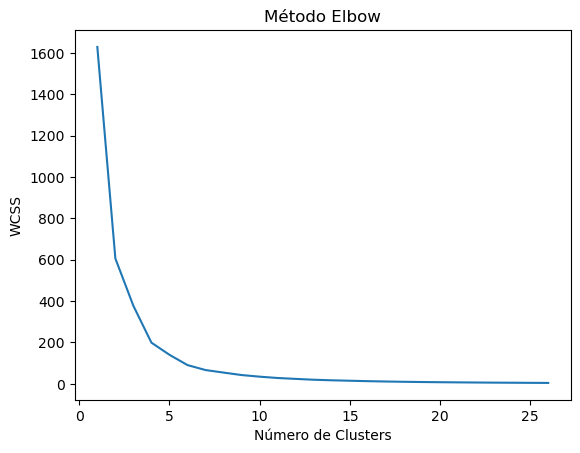

In [24]:
#Depois disso, você precisa selecionar as colunas que deseja usar para aplicar o método de elbow. 
#Você pode usar o seguinte código para selecionar as colunas:
#X = df.iloc[:, [0, 1]].values

#Em seguida, você precisa executar o método de elbow para determinar o número ideal de clusters. 
#Você pode usar o seguinte código para executar o método de elbow:
wcss = []
for i in range(1,27):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Df_Segmentação2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 27), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:


def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    data['cluster'] = kmeans.labels_
    report = data.groupby('cluster').agg(['count', 'mean'])
    report['percent'] = report[('Credit_Limit', 'count')] / data.shape[0]
    return report


all_reports = []
for n_clusters in range(8, 12):
    report = kmeans_clustering(Df_Segmentação2, n_clusters)
    all_reports.append(report)

final_report = pd.concat(all_reports, keys=['2 clusters', '4 clusters', '6 clusters', '8 clusters'])

In [26]:
final_report

Attrited Customer           Existing Customer            \
                               count      mean             count      mean   
           cluster                                                           
2 clusters 0                    4496  0.000000              4496  0.081050   
           1                     640  0.000000               640  0.963731   
           2                     173  0.898178               173  0.000000   
           3                     978  0.000000               978  0.399300   
           4                     344  0.360988               344  0.000000   
           5                    1766  0.000000              1766  0.215890   
           6                     620  0.000000               620  0.638933   
           7                    1110  0.093647              1110  0.000000   
4 clusters 0                    4496  0.000000              4496  0.081050   
           1                    1766  0.000000              1766  0.215890   
           2                     978  0.000000               978  0.399300   
           3                    1110  0.093647              1110  0.000000   
           4                     640  0.000000               640  0.963731   
           5                     258  0.000000               258  0.719650   
           6                     344  0.360988               344  0.000000   
           7                     173  0.898178               173  0.000000   
           8                     362  0.000000               362  0.581406   
6 clusters 0                    1008  0.000000              1008  0.181341   
           1                     344  0.360988               344  0.000000   
           2                    1110  0.093647              1110  0.000000   
           3                    4496  0.000000              4496  0.081050   
           4                     640  0.000000               640  0.963731   
           5                     362  0.000000               362  0.581406   
           6                     978  0.000000               978  0.399300   
           7                     173  0.898178               173  0.000000   
           8                     258  0.000000               258  0.719650   
           9                     758  0.000000               758  0.261833   
8 clusters 0                     344  0.360988               344  0.000000   
           1                     411  0.000000               411  0.460679   
           2                    4496  0.000000              4496  0.081050   
           3                     758  0.000000               758  0.261833   
           4                     362  0.000000               362  0.581406   
           5                    1110  0.093647              1110  0.000000   
           6                    1008  0.000000              1008  0.181341   
           7                     640  0.000000               640  0.963731   
           8                     173  0.898178               173  0.000000   
           9                     258  0.000000               258  0.719650   
           10                    567  0.000000               567  0.354808   

                   Credit_Limit             percent  
                          count      mean            
           cluster                                   
2 clusters 0               4496  0.041092  0.443962  
           1                640  0.962154  0.063197  
           2                173  0.893750  0.017083  
           3                978  0.373180  0.096574  
           4                344  0.333202  0.033969  
           5               1766  0.181795  0.174385  
           6                620  0.623233  0.061222  
           7               1110  0.054237  0.109608  
4 clusters 0               4496  0.041092  0.443962  
           1               1766  0.181795  0.174385  
           2                978  0.373180  0.096574  
           3               1110  0.054237  0.109608  
          

In [29]:
# Determine o nome do arquivo Excel
filename = 'Segmentação2.xlsx'

# Chame a função to_excel() com o nome do arquivo para exportar o dataframe
final_report.to_excel(filename)